# Несбалансированные выборки. Практическая работа

## Цель практической работы

Научиться обрабатывать несбалансированные данные и обучать модели машинного обучения на таких данных.

## Что входит в работу


1. Загрузить данные и провести разведочный анализ.
2. Разделить данные на обучающую и тестовую выборки.
3. Подготовить данные для моделирования.
4. Сбалансировать данные методом SMOTE и обучить модель машинного обучения.
5. Обучить модель машинного обучения с использованием весов классов и кросс-валидации.
6. Сравнить метрики качества четырёх моделей.




## Что оценивается 

- Выполнены все этапы работы.
- Не допущена утечка данных при разделении выборок и подготовке данных.
- Данные корректным образом сбалансированы.
- Модели не переобучены.


## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.


# Задача

Пусть у нас имеется некоторый набор данных `german_credit_data.csv` о заёмщиках банка:

* Age — возраст заёмщика.
* Sex — пол заёмщика.
* Job — тип работы заёмщика.
* Housing — тип жилья заёмщика.
* Saving accounts — объём средств на сберегательных счетах заёмщика.
* Checking account — объём средств на основном счёте заёмщика.
* Credit amount — размер кредита. 
* Duration — срок кредита (в месяцах).
* Purpose — цель кредита.
* Risk — таргет, допустил ли заёмщик просрочку платежей по кредиту.

Решите задачу классификации заёмщиков, чтобы банк умел заранее предсказывать просрочку платежей по кредиту. 



# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')

# Загрузка датасета
df = pd.read_csv("german_credit_data.csv")

# Первые пять строк датасета
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [2]:
# Вывод информации о датасете (количество строк и столбцов, типы данных)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


Очень много пропусков в колонках Saving accounts (объём средств на сберегательных счетах заёмщика) и
Checking account (объём средств на основном счёте заёмщика). Почти 20% и 40%

In [3]:
# Основные статистические характеристики числовых признаков
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [4]:
df.sort_values(by='Credit amount', ascending=False).head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
915,32,female,3,own,little,moderate,18424,48,vacation/others,bad
95,58,male,2,rent,little,moderate,15945,54,business,bad
818,43,male,3,own,little,little,15857,36,vacation/others,good
887,23,male,2,own,little,moderate,15672,48,business,bad
637,21,male,2,own,little,NaN,15653,60,radio/TV,good
917,68,male,3,own,little,little,14896,6,car,bad
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
236,23,male,0,own,NaN,moderate,14555,6,car,bad
63,25,male,2,own,little,moderate,14421,48,business,bad
378,57,male,3,free,little,moderate,14318,36,car,bad


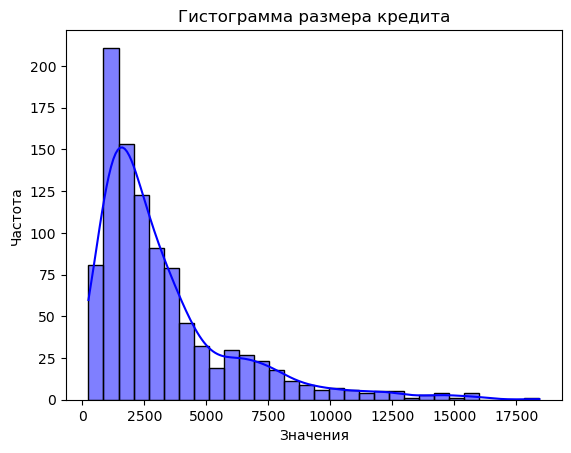

In [5]:
sns.histplot(df['Credit amount'], bins=30, kde=True, color='blue')

plt.title('Гистограмма размера кредита')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.show()

Присудствуют анамалии в колонках Age (возраст заёмщика) и Duration (срок кредита (в месяцах)), а так же в колонке Credit amount (размер кредита) которые похожи на выбросы, но учитывая специфику данных это лишь анамалии

In [6]:
# Распределение значений целевой переменной
df['Risk'].value_counts()

# Не так сильно несбалансировано, можно работать

Risk
good    700
bad     300
Name: count, dtype: int64

In [7]:
df['Housing'].value_counts()

# Видим что большая часть клиентов имеют собственное жилье

Housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [8]:
df['Saving accounts'].value_counts()

# Колонка показывает что в сберегательном счете только у малой доли клиентов значительные вклады

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [9]:
df['Checking account'].value_counts()

# На оснавном счете все более менее равномерно, 
# не учитывая богатый слой клиентов небольше и умеренные объемы средств почти что равны.
# Но вот значительных объемов средств меньше в разы

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [10]:
df['Purpose'].value_counts()

# Можем сказать что на машины, телевизоры(или радио...) а так же мебель берут больше всего кредитов, 
# тогда как на бизнес и учебу в разы меньше. 
# А на прочие целы можно сказать почти что не берут

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

В целом классы не сбалансированы

# Задание 2

Разделите датасет на обучающую и тестовую выборки в пропорции 80:20. Разделение должно быть стратифицированным по таргету Risk.

В этом и следующих заданиях используйте random_state = 1.

In [11]:
# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df.drop('Risk', axis=1), df['Risk'], 
                                                    test_size=0.2, stratify=df['Risk'], 
                                                    random_state=1)

# Задание 3

Проведите этап очистки и подготовки данных (data preparation) и подготовьте данные к моделированию.

In [12]:
# Заполним пропуски

from sklearn.impute import SimpleImputer

# Создаем экземпляр SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# Заполняем пропущенные значения средними значениями для указанных столбцов
X_train[['Saving accounts', 'Checking account']] = imputer.fit_transform(X_train[['Saving accounts', 'Checking account']])
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 561 to 664
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int64 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int64 
 3   Housing           800 non-null    object
 4   Saving accounts   800 non-null    object
 5   Checking account  800 non-null    object
 6   Credit amount     800 non-null    int64 
 7   Duration          800 non-null    int64 
 8   Purpose           800 non-null    object
dtypes: int64(4), object(5)
memory usage: 62.5+ KB


In [13]:
# Создадим дамми переменные

X_train = pd.get_dummies(X_train, drop_first=True).astype(int)

In [14]:
# Посмотрим на результат

X_train.head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
561,24,1,1546,24,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
613,22,2,3632,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
352,38,3,3229,18,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
568,41,2,3979,48,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
295,26,2,9960,48,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 586 to 784
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               200 non-null    int64 
 1   Sex               200 non-null    object
 2   Job               200 non-null    int64 
 3   Housing           200 non-null    object
 4   Saving accounts   160 non-null    object
 5   Checking account  113 non-null    object
 6   Credit amount     200 non-null    int64 
 7   Duration          200 non-null    int64 
 8   Purpose           200 non-null    object
dtypes: int64(4), object(5)
memory usage: 15.6+ KB


In [16]:
# Сделаем тоже самое для X_test

# Создаем экземпляр SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# Заполняем пропущенные значения средними значениями для указанных столбцов
X_test[['Saving accounts', 'Checking account']] = imputer.fit_transform(X_test[['Saving accounts', 'Checking account']])
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 586 to 784
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               200 non-null    int64 
 1   Sex               200 non-null    object
 2   Job               200 non-null    int64 
 3   Housing           200 non-null    object
 4   Saving accounts   200 non-null    object
 5   Checking account  200 non-null    object
 6   Credit amount     200 non-null    int64 
 7   Duration          200 non-null    int64 
 8   Purpose           200 non-null    object
dtypes: int64(4), object(5)
memory usage: 15.6+ KB


In [17]:
# Создадим дамми переменные

X_test = pd.get_dummies(X_test, drop_first=True).astype(int)

X_test.head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
586,36,2,2799,9,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
803,35,2,976,12,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
846,68,2,6761,18,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
932,30,2,1224,9,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
788,50,2,6224,48,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


# Задание 4

Сбалансируйте обучающую выборку методом SMOTE и обучите модель RandomForestClassifier. Подберите оптимальные гиперпараметры с помощью GridSearch. Посчитайте метрику ROC-AUC на тестовой выборке.

In [18]:
from imblearn.over_sampling import SMOTE

# Применяем SMOTE для балансировки обучающей выборки
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Определение параметров для поиска по сетке
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Инициализация модели RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

# Подбор оптимальных гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Вывод оптимальных гиперпараметров
print("Best parameters:", grid_search.best_params_)

# Предсказание вероятностей на тестовой выборке
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Вычисление метрики ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC score on test set:", roc_auc)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
ROC-AUC score on test set: 0.6594047619047618


# Задание 5

Обучите модель RandomForestClassifier с использованием весов классов. Подберите оптимальные веса и гиперпараметры с помощью GridSearch. Посчитайте метрику ROC-AUC на тестовой выборке.

In [21]:
# Создание экземпляра RandomForestClassifier с весами классов
rf_classifier = RandomForestClassifier(max_depth=15, min_samples_leaf=1,
                                       min_samples_split=2, n_estimators=100, random_state=1)

# Обучение модели на обучающей выборке
rf_classifier.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Вычисление метрики ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC-AUC score:", roc_auc)

ROC-AUC score: 0.6869047619047619
